In [1]:
# basic library
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os 

In [3]:
# for image detection
import cv2

In [4]:
# load neural network models
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Activation, Conv2D, MaxPooling2D

In [5]:
path = 'D:\\Projects_ml\\Dog_Cat_CNN\\train'

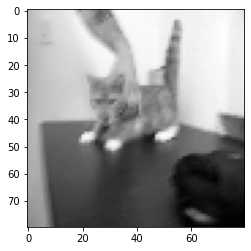

In [6]:
for p in os.listdir(path):
    category = p.split(".")[0]
    img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
    new_img_array = cv2.resize(img_array, dsize = (80,80))
    plt.imshow(new_img_array, cmap="gray")
    break

In [7]:
X = []
Y = []

convert = lambda category : int(category == 'dog')

In [8]:
def create_test_data(path):
    for p in os.listdir(path):
        category = p.split(".")[0]
        category = convert(category)
        img_array = cv2.imread(os.path.join(path,p),cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize = (80,80))
        X.append(new_img_array)
        Y.append(category)

In [9]:
import numpy as np
create_test_data(path)
X = np.array(X).reshape(-1,80,80,1)
Y = np.array(Y)

In [10]:
# Normalize the data
''' You can normalize the data. We can use keras normalize here also.
But well we already know all values are having range between 0-255 so we xan just divide by 255 and get 
all values scaled between 0 - 1'''

X = X/255.0

In [11]:
X.shape

(25000, 80, 80, 1)

In [12]:
Y.shape

(25000,)

In [13]:
model = Sequential()

# adding a densely connecter layer with 64 units to the model
model.add(Conv2D(64, (3,3), activation = 'relu', input_shape = X.shape[1:]))
model.add(MaxPooling2D(pool_size = (2,2)))

# adding another layer
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# Flatten the model
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))

# adding sigmoid layer 
model.add(Dense(1, activation = 'sigmoid'))

# compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 78, 78, 64)        640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 39, 39, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 37, 37, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 18, 18, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 20736)             0         
_________________________________________________________________
dense (Dense)                (None, 64)                1327168   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [14]:
model.fit(X,Y, epochs = 10, batch_size=32, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 137s 219ms/step - loss: 0.6048 - accuracy: 0.6746 - val_loss: 0.9058 - val_accuracy: 0.4364
Epoch 2/10
625/625 [==============================] - 133s 213ms/step - loss: 0.5115 - accuracy: 0.7495 - val_loss: 0.9267 - val_accuracy: 0.4660
Epoch 3/10
625/625 [==============================] - 134s 214ms/step - loss: 0.4577 - accuracy: 0.7806 - val_loss: 0.6802 - val_accuracy: 0.6572
Epoch 4/10
625/625 [==============================] - 138s 221ms/step - loss: 0.4174 - accuracy: 0.8082 - val_loss: 0.4514 - val_accuracy: 0.8028
Epoch 5/10
625/625 [==============================] - 135s 217ms/step - loss: 0.3797 - accuracy: 0.8285 - val_loss: 0.7764 - val_accuracy: 0.6428
Epoch 6/10
625/625 [==============================] - 137s 220ms/step - loss: 0.3324 - accuracy: 0.8545 - val_loss: 0.6800 - val_accuracy: 0.7040
Epoch 7/10
625/625 [==============================] - 137s 219ms/step - loss: 0.2901 - accuracy: 0.8764 - val_loss: 0.5248 -

# Fitting the model with the test data

In [15]:
path = 'D:\\Projects_ml\\Dog_Cat_CNN\\test1'

In [16]:
X_Test = []
id_line = []

In [17]:
def create_test1_data(path):
    for p in os.listdir(path):
        id_line.append(p.split(".")[0])
        img_array = cv2.imread(os.path.join(path,p), cv2.IMREAD_GRAYSCALE)
        new_img_array = cv2.resize(img_array, dsize = (80,80))
        X_Test.append(new_img_array)

In [18]:
create_test1_data(path)
X_Test = np.array(X_Test).reshape(-1,80,80,1)
X_Test = X_Test/255

In [19]:
predictions = model.predict(X_Test)

#rounding the value since sigmoid give a probablity
predicted_val = [int(round(p[0])) for p in predictions]

In [31]:
np.shape(predicted_val)

(4549,)

In [32]:
from sklearn.metrics import classification_report

In [33]:
from sklearn.metrics import accuracy_score

In [34]:
# print(classification_report(X_Test,predicted_val))

In [39]:
submission_df = pd.DataFrame({'id': id_line, 'label':predicted_val})

In [37]:
os.chdir('D:\\Projects_ml\\Dog_Cat_CNN\\predicted')
submission_df.to_csv("submission.csv", index = False)

# checking the devices

In [1]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 7512130498299447026
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 9585362896532437386
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 10861001316188559401
physical_device_desc: "device: XLA_GPU device"
]


In [3]:
import tensorflow as tf
tf.test.is_gpu_available(
  cuda_only=False, min_cuda_compute_capability=None
)

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


False